Import the all Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import math
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
        

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
# Load our warnings libraries
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read train data
train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Read test data
test = pd.read_csv('/kaggle/input/titanic/test.csv')


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now Lets Explore the train data .

# Data Analysis and Visualization

In [5]:
print("no. of passengers:" +str(len(train.index)))
#prints the total n0. of passengers

no. of passengers:891


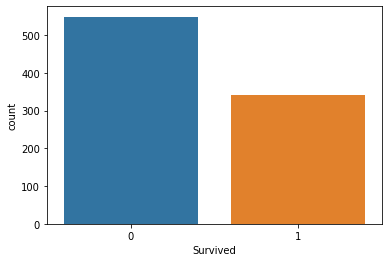

In [6]:
sns.countplot(x ="Survived", data = train)
#no. of survivived passengers

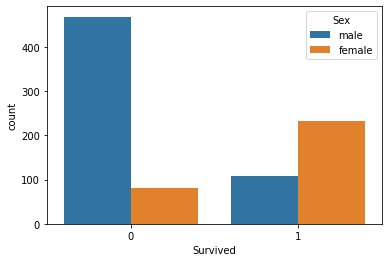

In [7]:
sns.countplot(x ="Survived",hue ="Sex", data = train)
#no. of male survived vs female survived

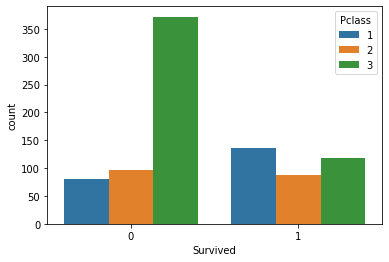

In [8]:
sns.countplot(x ="Survived",hue = "Pclass", data = train)
#survival passenger class (Pclass) wise

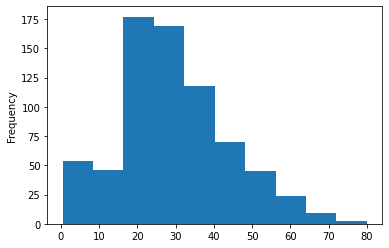

In [9]:
train["Age"].plot.hist()

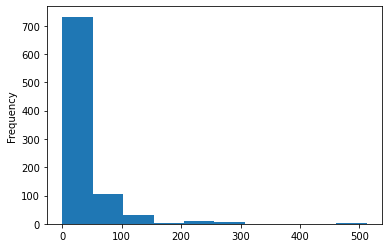

In [10]:
train["Fare"].plot.hist()

In [11]:
train.info()
#gives the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


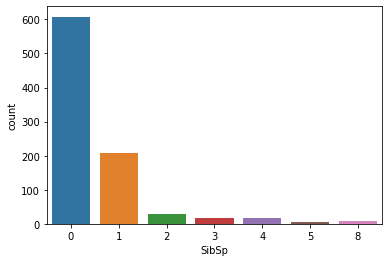

In [12]:
sns.countplot(x ="SibSp", data = train)

In [13]:
train.isnull()
#checking null values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
train.isnull().sum()
#sum of null values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

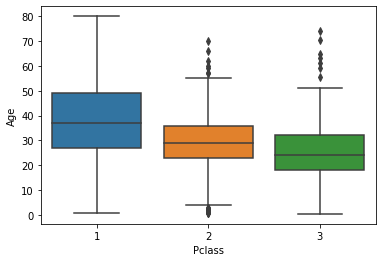

In [15]:
sns.boxplot(x="Pclass", y ="Age",data = train)
#pclass vs age box plot

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.drop("Cabin", axis =1, inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
train.dropna(inplace=True)
#droping all nan values

In [20]:
train.isnull().sum()
#checking if there is any nan values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
sex =pd.get_dummies(train['Sex'], drop_first = True)
sex.head()
#there should not be any string values in data so get dummy values using get_dummies

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
embarked =pd.get_dummies(train['Embarked'], drop_first = True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
pcl =pd.get_dummies(train['Pclass'], drop_first = True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [24]:
train = pd.concat([train,sex,embarked,pcl],axis = 1)
#concat all three

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [26]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket','Pclass'], axis=1,inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


# Now lets Train our model and apply algorithms

# 1. Logistic Regression



In [28]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived','PassengerId'], axis=1), 
                                                    train['Survived'], test_size = 0.2, 
                                                    random_state = 0)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()

In [31]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.85        82\n           1       0.84      0.70      0.77        61\n\n    accuracy                           0.82       143\n   macro avg       0.82      0.80      0.81       143\nweighted avg       0.82      0.82      0.82       143\n'

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,predictions)

array([[74,  8],
       [18, 43]])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,predictions)

0.8181818181818182

# 2. Gradient Boost Classifier


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(pred, y_test) * 100, 2)
print(acc_gbk)


83.22


#  we got an accuracy of 81.8% and 83.22% which is not bad actually.
# now, lets look into test data set




In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
test.drop("Cabin", axis =1, inplace=True)
#drop cabin because of nan values

In [42]:
sex1 =pd.get_dummies(test['Sex'], drop_first = True)
sex1.head()

# do the same what we have done to train data set, get dummy values .

,male
0,1
1,0
2,1
3,1
4,0


In [43]:
embarked1 =pd.get_dummies(test['Embarked'], drop_first = True)
embarked1.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [44]:
pcl1 =pd.get_dummies(test['Pclass'], drop_first = True)
pcl1.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [45]:
test = pd.concat([test,sex1,embarked1,pcl1],axis = 1)

In [46]:
test.drop(['Sex', 'Embarked', 'Name', 'Ticket','Pclass'], axis=1,inplace=True)

In [47]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [48]:
test.fillna(test.mean(), inplace=True)
#fill nan values with mean values.to avoid errors

In [49]:
# submit your predictions in csv format
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

# Yeah we are done. hope my notebook is useful to you. Thanks for Reading, Upvote if you like it. 